In [1]:
import os
import psycopg2

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

os.chdir(r'C:\users\barby\downloads')

%matplotlib inline

def dbGetQuery(q):
    pw = pd.read_table(r'c:\users\barby\documents\config.txt', header = None)[0].item().split('=')[1]
    conn_string = "host='kavdb.c9lrodma91yx.us-west-2.rds.amazonaws.com' dbname='kavdb' user='lkavenagh' password='" + pw + "'"
    conn = psycopg2.connect(conn_string)
    conn.autocommit = True
    dat = pd.read_sql(q, conn)
    conn.close()
    return(dat)

In [2]:
dat = dbGetQuery("SELECT * FROM runs.activities")
dat['year'] = [c.year for c in dat.date]
dat['doy'] = [c.timetuple().tm_yday for c in dat.date]
dat = dat.sort_values('date')
dat['ytd_distance'] = dat.groupby('year', as_index = False).cumsum()['distance']

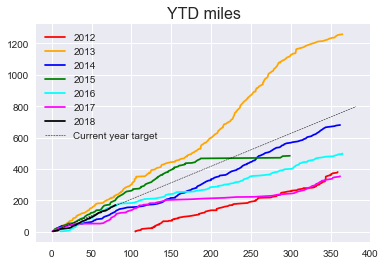

In [16]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()

target = 800

colors = ['red', 'orange', 'blue', 'green', 'cyan', 'magenta', 'black']

for i,y in enumerate(sorted(list(set(dat.year)))):
    ax.plot(dat.loc[dat.year == y, 'doy'], 
            dat.loc[dat.year == y, 'ytd_distance'], 
            color = colors[i],
            label = y)

x = range(int(ax.get_xlim()[1]))
y = [(target / ax.get_xlim()[1]) * x for x in x]
ax.plot(x, y, color = 'black', ls = '--', label = 'Current year target', linewidth = 0.5)
ax.legend(loc = 'best')
ax.set_title('YTD miles', fontsize = 16)